### CS Info

There has been lots of talking about diversity in the workplace, especially in technology. The Head of HR at your company is very concerned about that and has asked you to analyze internal data about employees and see whether results suggest that the company is treating all its employees fairly or not.
Specifically, she gave you the following tasks:
In the company there are 6 levels (described below). Identify, for each employee, her corresponding level.
Individual Contributors(IC) - they don’t manage anyone
Middle Managers(MM) - they are the direct bosses of IC
Directors(D) - they are the direct bosses of MM
VP - D direct bosses
Executives (E) - VP direct bosses
CEO - The direct boss of E.
How many people each employee manages? Consider that if John directly manages 2 people and these two people manage 5 people each, then we conclude that John manages 12 people.
Build a model to predict the salary of each employee.
Describe the main factors impacting employee salaries. Do you think the company has been treating all its employees fairly? What are the next steps you would suggest to the Head of HR?

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline 

In [120]:
employee = pd.read_csv('../diversity/employee.csv')

In [121]:
employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   employee_id     10000 non-null  int64  
 1   signing_bonus   10000 non-null  int64  
 2   salary          10000 non-null  float64
 3   degree_level    10000 non-null  object 
 4   sex             10000 non-null  object 
 5   yrs_experience  10000 non-null  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 468.9+ KB


In [122]:
employee[['degree_level', 'salary']].groupby('degree_level').mean().round()

,salary
degree_level,
Bachelor,187939.0
High_School,188089.0
Master,188145.0
PhD,191804.0


In [123]:
merged = pd.merge(employee, company, how='inner', on=['employee_id'])

In [124]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   employee_id     10000 non-null  int64  
 1   signing_bonus   10000 non-null  int64  
 2   salary          10000 non-null  float64
 3   degree_level    10000 non-null  object 
 4   sex             10000 non-null  object 
 5   yrs_experience  10000 non-null  int64  
 6   boss_id         9999 non-null   float64
 7   dept            10000 non-null  object 
dtypes: float64(2), int64(3), object(3)
memory usage: 703.1+ KB


In [125]:
merged[merged['boss_id']==61554] 

,employee_id,signing_bonus,salary,degree_level,sex,yrs_experience,boss_id,dept
8184,93708,1,500000.0,PhD,F,28,61554.0,HR
8235,51535,1,650000.0,PhD,M,33,61554.0,engineering
9119,11277,1,550000.0,Master,M,22,61554.0,sales
9410,110464,1,550000.0,Master,M,21,61554.0,marketing


In [126]:
boss = set(merged.boss_id)

merged['is_manager'] = merged['employee_id'].apply(lambda x: x in boss)


In [127]:

reports = (merged['boss_id'].value_counts())
reports_df = pd.DataFrame(reports)

In [128]:
merged = pd.merge(merged, reports, how='left', left_on=['employee_id'], right_on=reports.index)

In [129]:
merged['boss_id_y'].fillna(0, inplace=True)

In [130]:
merged['direct_reports'] = merged['boss_id_y']

In [131]:
merged['boss_id'] = merged['boss_id_x']

In [132]:
merged.drop(labels=['boss_id_y', 'boss_id_x'], axis=1, inplace=True)

In [194]:
merged.head(50)

,signing_bonus,salary,degree_level,sex,yrs_experience,dept,is_manager,direct_reports,boss_id
employee_id,,,,,,,,,
138719,0,273000.0,Master,M,2,engineering,False,0.0,43602.0
3192,0,301000.0,Bachelor,F,1,sales,False,0.0,87847.0
114657,0,261000.0,Master,F,2,sales,False,0.0,180854.0
29039,0,86000.0,High_School,F,4,HR,False,0.0,88370.0
118607,0,126000.0,Bachelor,F,3,sales,False,0.0,23565.0
91334,0,221000.0,PhD,F,2,sales,False,0.0,62990.0
101901,1,194000.0,PhD,M,12,engineering,True,6.0,7558.0
171111,1,119000.0,Master,F,1,engineering,False,0.0,30468.0
23443,1,217000.0,PhD,M,8,sales,False,0.0,130585.0


In [185]:
merged.set_index(keys='employee_id', inplace=True)
merged.to_csv('../company_x.csv')

In [199]:
##Total Reports

In [200]:
from collections import defaultdict
emp_dict = defaultdict(int)

In [207]:
for employee in merged.index.values:
    emp_dict[employee] = merged.loc[employee]['direct_reports']

In [209]:
boss_dict = defaultdict(list)

boss_dict[merged['boss_id']
    
    


SyntaxError: unexpected EOF while parsing (<ipython-input-209-6604e2349e95>, line 5)

In [198]:
merged['total_reports'] =

,signing_bonus,salary,degree_level,sex,yrs_experience,dept,is_manager,direct_reports,boss_id
employee_id,,,,,,,,,
138719,0,273000.0,Master,M,2,engineering,False,0.0,43602.0
3192,0,301000.0,Bachelor,F,1,sales,False,0.0,87847.0
114657,0,261000.0,Master,F,2,sales,False,0.0,180854.0
29039,0,86000.0,High_School,F,4,HR,False,0.0,88370.0
118607,0,126000.0,Bachelor,F,3,sales,False,0.0,23565.0


In [196]:
total_reports

,direct_reports
boss_id,
79.0,9
90.0,8
252.0,10
742.0,17
754.0,16
...,...
198879.0,13
198893.0,2
199184.0,15


In [178]:
#total_reports_df = pd.DataFrame(total_reports)

In [181]:
#total_reports.head(50)

## EDA 

(array([1.483e+03, 1.065e+03, 8.420e+02, 9.100e+02, 9.240e+02, 9.490e+02,
        8.670e+02, 7.430e+02, 6.780e+02, 5.340e+02, 4.060e+02, 3.170e+02,
        2.130e+02, 6.400e+01, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        1.000e+00]),
 array([ 60000.,  85600., 111200., 136800., 162400., 188000., 213600.,
        239200., 264800., 290400., 316000., 341600., 367200., 392800.,
        418400., 444000., 469600., 495200., 520800., 546400., 572000.,
        597600., 623200., 648800., 674400., 700000.]),
 <a list of 25 Patch objects>)

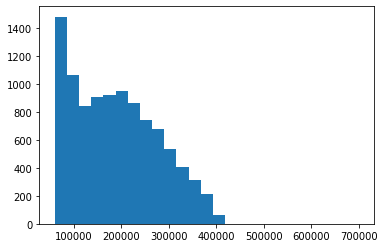

In [28]:
plt.hist(merged['salary'], bins=25)

In [92]:
man = merged[merged['sex']=='M']
woman = mans = merged[merged['sex']=='F']

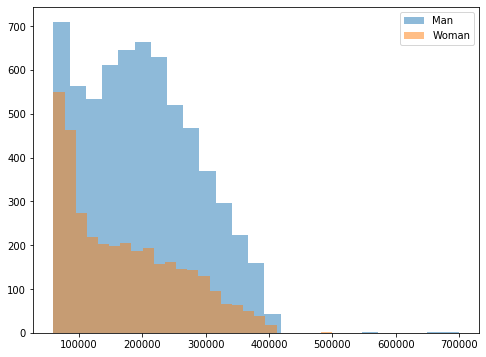

In [93]:
fig, ax = plt.subplots(figsize=(8,6))

ax.hist(man['salary'], bins=25, alpha=.5, label='Man')
ax.hist(woman['salary'], bins=25, alpha=.5, label='Woman')
ax.legend()

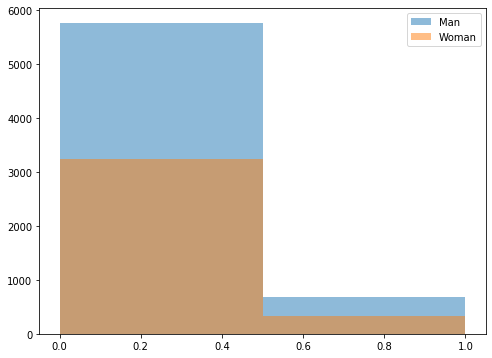

In [98]:
fig, ax = plt.subplots(figsize=(8,6))

ax.hist(man['is_manager'].astype(int), bins=2, alpha=.5, label='Man')
ax.hist(woman['is_manager'].astype(int), bins=2, alpha=.5, label='Woman')
ax.legend()

In [101]:
man['is_manager'].sum() / len(man['is_manager'])

0.10529585339338407

In [102]:
woman['is_manager'].sum() / len(man['is_manager'])

0.0498524615623544

In [ ]:
#I could using signing bonus? 

'''Ideas for Columns
    - number of promotions received
        - bias more promotions for men
    - avg_annual_review score 
    - Race Column = W, B, A, N, H
    - Is manager?
    - Employee supervised?

What is the benefit that is being distributed? (needs to be binary)
- Promotion Recommender 
- Salary in top 10% of dept? 
'''

In [15]:
merged['employee_id'].values

array([138719,   3192, 114657, ..., 193115,  14249,  72227])

In [23]:
from collections import defaultdict



In [33]:
merged['is_manager'] = merged.apply(lambda x: x['employee_id'] == x['boss_id'])



# d = {}
# for employee in merged['employee_id'].values:
#     if employee not in d:
#             d[employee] = False 
#     for boss in merged['boss_id'].values:
#         if employee == boss:
#             d[employee] == True
            

KeyError: 'employee_id'